In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import community
import random
from collections import Counter
from networkx.utils import groups

In [0]:
downloaded = drive.CreateFile({'id':'1hLXU94qD7us9QN_RKI6cz7Ez8qQVwpMh'}) 
downloaded.GetContentFile('facebook_combined.txt')

In [0]:
G=nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(),nodetype=int)

In [0]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [0]:
pos_list=nx.spring_layout(G)

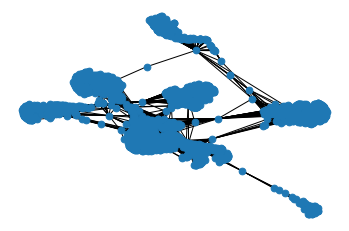

In [0]:
plt.axis("off")
nx.draw_networkx(G,pos=pos_list,with_labels=False,node_size=45)

In [0]:
lpa_com=list(community.asyn_lpa_communities(G,weight=None,seed=None))

In [0]:
print(lpa_com[0])

{0, 1, 3, 5, 7, 9, 10, 11, 12, 13, 15, 16, 18, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 35, 37, 38, 39, 40, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 90, 92, 94, 96, 97, 98, 100, 101, 103, 104, 105, 106, 109, 113, 114, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 132, 133, 134, 138, 141, 142, 145, 146, 148, 150, 153, 155, 156, 157, 158, 160, 161, 163, 164, 165, 166, 168, 169, 170, 172, 173, 176, 178, 179, 180, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 199, 200, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 221, 222, 223, 224, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 260, 261, 265, 266, 267, 268, 269, 270, 271, 272, 274, 276, 277, 280, 283, 285, 286, 287, 288, 290, 291, 292, 294, 295, 297, 298, 299, 300, 301, 302,

In [0]:
print(len(lpa_com))

79


In [0]:
#asynchronous lpa_comm

def lpa_com_usrdefined(G,weight=None):
  label={}
  for i,n in enumerate(G):
    label[n]=i
  #print(label)
  nodes=list(G)
  random.shuffle(nodes)
  for node in nodes:
    label_freq = Counter()
    for v in G[node]:
                label_freq.update({label[v]: G.edges[node, v][weight]
                                   if weight else 1})
    max_freq = max(label_freq.values())
    best_labels = [labels for labels, freq in label_freq.items()
                           if freq == max_freq]
    if label[node] not in best_labels:
                label[node] = random.choice(best_labels)
                #cont = True
    yield from groups(label).values()

In [0]:
res=list(lpa_com_usrdefined(G))

In [0]:
print(len(res))

8761859


In [0]:
def label_propagation_communities(G):
  label_list = dict()
  labels={}
  for i,n in enumerate(G):
    labels[n]=i
  colors=nx.coloring.greedy_color(G)
  for n,c in colors.items():
    if c in label_list:
      label_list[c].add(n)
    else:
      label_list[c]={n}
  #print(label_list)
  #print(labels)
  while not labeling_complete(labels, G):
    for color, nodes in label_list.items():
      for n in nodes:
        _update_label(n, labels, G)
  for label in set(labels.values()):
    yield {x for x in labels if labels[x] == label}



In [0]:
def labeling_complete(labeling, G):
  return all(labeling[v] in _most_frequent_labels(v, labeling, G)
               for v in G if len(G[v]) > 0)
  

In [0]:
def _most_frequent_labels(node, labeling, G):
  if not G[node]:
    return {labeling[node]}
  freqs = Counter(labeling[q] for q in G[node])
  max_freq = max(freqs.values())
  return {label for label, freq in freqs.items() if freq == max_freq}

In [0]:
def _update_label(node, labeling, G):
  high_labels = _most_frequent_labels(node, labeling, G)
  if len(high_labels) == 1:
        labeling[node] = high_labels.pop()
  elif len(high_labels) > 1:
    if labeling[node] not in high_labels:
      labeling[node] = max(high_labels)

In [0]:
res=list(label_propagation_communities(G))

In [0]:
print(res[10])

{644, 648, 653, 654, 655, 657, 660, 663, 664, 666, 672, 677, 678, 679, 680, 682, 684, 685, 573, 574, 575, 579, 584, 588, 589, 590, 592, 597, 598, 603, 605, 609, 611, 612, 616, 617, 618, 619, 620, 621, 622, 623, 625, 626, 630, 631, 633, 636, 639}


In [0]:
label_propagation_communities(G)

<generator object label_propagation_communities at 0x7fa371160570>

In [0]:
print(len(res))

44


In [0]:
print(len(G[0]))


347
